<a href="https://colab.research.google.com/github/karishmasd/ML/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import copy
import matplotlib.pyplot as plt
%matplotlib inline


#**Data**

In [2]:
def load_data():
    data = np.loadtxt("/content/drive/MyDrive/Data/ex2data1.txt", delimiter=',')
    X = data[:,:2]
    y = data[:,2]
    return X, y


In [3]:
X_train,y_train=load_data()

In [4]:
X_train[:5]

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644]])

In [5]:
y_train[:5]

array([0., 0., 0., 1., 1.])

In [6]:
X_train.shape

(100, 2)

In [7]:
y_train.shape

(100,)

In [8]:
def plot_data(X, y, pos_label="y=1", neg_label="y=0"):
    positive = y == 1
    negative = y == 0

    # Plot examples
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)



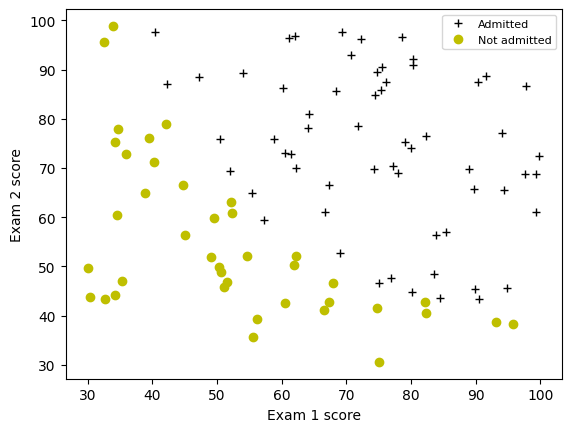

In [9]:
plot_data(X_train, y_train[:], pos_label="Admitted", neg_label="Not admitted")
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
plt.legend(loc="upper right",fontsize=8)
plt.show()

#**Sigmoid function**

In [10]:
def sigmoid(z):
  s=1/(1+np.exp(-z))
  return s

In [11]:
# checking sigmoid function we know that  sigmoid of 0 should be 0.5
check_value=0
sigmoid(check_value)

0.5

#**Cost Function for logistic Regression**

In [12]:
def compute_cost(X,y,w,b):
  total_cost=0
  m=X_train.shape[0]
  for i in range(m):
    f=np.dot(X[i],w)+b
    cost=-((y[i]*np.log(sigmoid(f)))+((1-y[i])*np.log(1-sigmoid(f))))
    total_cost+=cost
  total_cost=total_cost/m
  return total_cost

In [13]:
m, n = X_train.shape
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))

Cost at initial w and b (zeros): 0.693


#**Gradient for logistic regression**

In [15]:
def gradient(X,y,w,b):
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.
    for i in range(m):
        z_wb = 0
        for j in range(n):
            z_wb += X[i, j] * w[j]
        z_wb +=b
        f_wb = sigmoid(z_wb)

        dj_db_i =f_wb - y[i]
        dj_db += dj_db_i

        for j in range(n):
            dj_dw[j] +=  (f_wb - y[i]) * X[i, j]

    dj_dw = dj_dw/m
    dj_db = dj_db/m


    return dj_db, dj_dw


In [17]:
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}' )

dj_db at initial w and b (zeros):-0.1
dj_dw at initial w and b (zeros):[-12.00921658929115, -11.262842205513591]


#**Learning parameters using Gradient Descent**

In [26]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient, alpha, num_iters, lambda_):
    m = len(X)
    J_history = []
    w_history = []

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient(X, y, w_in, b_in)

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            cost =  cost_function(X, y, w_in, b_in)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [27]:
np.random.seed(143)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b,
                                   compute_cost, gradient, alpha, iterations, 0)

Iteration    0: Cost     0.98   
Iteration 1000: Cost     0.31   
Iteration 2000: Cost     0.30   
Iteration 3000: Cost     0.30   
Iteration 4000: Cost     0.30   
Iteration 5000: Cost     0.30   
Iteration 6000: Cost     0.30   
Iteration 7000: Cost     0.30   
Iteration 8000: Cost     0.30   
Iteration 9000: Cost     0.30   
Iteration 9999: Cost     0.30   


#**Plotting decision boundary**

In [29]:
def plot_decision_boundary(w, b, X, y):

    plot_data(X[:, 0:2], y)

    if X.shape[1] <= 2:
        plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)

        plt.plot(plot_x, plot_y, c="b")

    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((len(u), len(v)))

        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = sig(np.dot(map_feature(u[i], v[j]), w) + b)

        # important to transpose z before calling contour
        z = z.T

        # Plot z = 0.5
        plt.contour(u,v,z, levels = [0.5], colors="g")

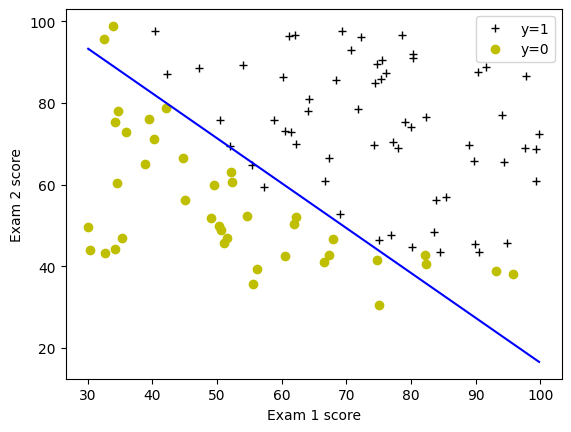

In [30]:
plot_decision_boundary(w, b, X_train, y_train)
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
plt.legend(loc="upper right")
plt.show()

#**Evaluating Logistic Regression**

In [32]:
def predict(X, w, b):
    m, n = X.shape
    p = np.zeros(m)

    # Loop over each example
    for i in range(m):
        z_wb = 0
        # Loop over each feature
        for j in range(n):
            # Add the corresponding term to z_wb
            z_wb += X[i, j] * w[j]

        # Add bias term
        z_wb += b

        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = (f_wb >= 0.5).astype(int)

    ### END CODE HERE ###
    return p

In [33]:
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 92.000000


#**Regularized Logistic Regression**